In [1]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from IPython import display
display.set_matplotlib_formats("svg")

C:\Users\Admin\AppData\Local\Temp\ipykernel_7072\906459842.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [2]:
data = pd.read_csv("mnist_train_small.csv", header=None)

# extract labels (number ID's) and remove from data
labels = data.values[:, 0]  # Convert DataFrame to NumPy before slicing
data = data.values[:, 1:]

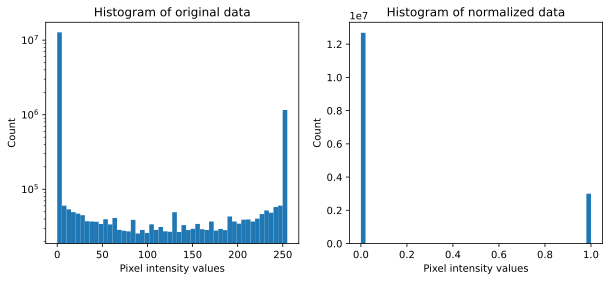

In [3]:
# normalize the data to a range of [0 1]
dataNorm = (data > 0).astype(float)

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel("Pixel intensity values")
ax[0].set_ylabel("Count")
ax[0].set_title("Histogram of original data")
ax[0].set_yscale("log")

ax[1].hist(dataNorm.flatten(), 50)
ax[1].set_xlabel("Pixel intensity values")
ax[1].set_ylabel("Count")
ax[1].set_title("Histogram of normalized data")

plt.show()

In [4]:
print(np.unique(data))
print(" ")
print(np.unique(dataNorm))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [5]:
# Step 1: convert to tensor
dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()

# Step 2: use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, test_size = .1)

# Step 3: convert into Pytorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Step 4: translate into dataloader objects
batchsize = 32
train_loader = DataLoader(train_data, batch_size = batchsize, shuffle = True, drop_last = True)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [6]:
# creating a class for the model
def createTheMNISTNet():
    class mnistNet(nn.Module):
        def __init__(self):
            super().__init__()

            # input layer
            self.input = nn.Linear(784, 64)

            # hidden layer
            self.fc1 = nn.Linear(64, 32)
            self.fc2 = nn.Linear(32, 32)

            # output layer
            self.output = nn.Linear(32, 10)

        # forward pass
        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return torch.log_softmax(self.output(x), axis = 1)

    # create the model instance
    net = mnistNet()

    # loss function
    lossfun = nn.NLLLoss()

    # optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr = .01) # Adam performs way too good for this model therefore we used SGD

    return net, lossfun, optimizer

In [7]:
# test the model with one batch
net, lossfun, optimizer = createTheMNISTNet()

X, y = next(iter(train_loader))
yHat = net(X)

# values are log-probability of each number (0-9)
print(yHat)

# now let's compute the loss
loss = lossfun(yHat, y)
print(" ")
print("Loss:")
print(loss)

tensor([[-2.3785, -2.3775, -2.2577, -2.2291, -2.2641, -2.2863, -2.2118, -2.4623,
         -2.2378, -2.3506],
        [-2.3594, -2.3904, -2.2240, -2.2306, -2.2540, -2.3360, -2.2208, -2.4689,
         -2.2260, -2.3493],
        [-2.3624, -2.3924, -2.2401, -2.2198, -2.2547, -2.3268, -2.2264, -2.4554,
         -2.2357, -2.3420],
        [-2.3871, -2.3749, -2.2174, -2.2521, -2.2575, -2.3220, -2.2056, -2.4647,
         -2.2192, -2.3599],
        [-2.3760, -2.3714, -2.2429, -2.2380, -2.2560, -2.3068, -2.2229, -2.4681,
         -2.2347, -2.3383],
        [-2.3872, -2.3884, -2.2309, -2.2297, -2.2628, -2.3024, -2.1884, -2.4811,
         -2.2357, -2.3582],
        [-2.3734, -2.3811, -2.2206, -2.2374, -2.2533, -2.3319, -2.2172, -2.4636,
         -2.2236, -2.3571],
        [-2.3567, -2.3657, -2.2284, -2.2563, -2.2462, -2.3349, -2.2423, -2.4610,
         -2.2330, -2.3274],
        [-2.3633, -2.3772, -2.2211, -2.2363, -2.2476, -2.3394, -2.2287, -2.4635,
         -2.2312, -2.3486],
        [-2.3826, -

In [8]:
 # train the model

def trainTheModel():

    # training parameter
    numepochs = 60
    
    # create a new model
    net, lossfun, optimizer = createTheMNISTNet()
    
    trainAcc = []
    testAcc = []
    losses = torch.zeros(numepochs)
    
    # train the model
    for epochi in range(numepochs):
        
        # loop over training data batches
        batchAcc = []
        batchLoss = []
        for X, y in train_loader:

            # forward pass and loss
            yHat = net(X)
            loss = lossfun(yHat, y)
            
            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute training accuracy for this batch
            matches = torch.argmax(yHat, axis = 1) == y # booleans (false/true); selects the class with the highest predicted probability for each input.
            # The == operator compares the predicted class to the actual class, returning a Boolean tensor (True for correct predictions, False for incorrect).
            matchesNumeric = matches.float() # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # avg and * by 100
            batchAcc.append(accuracyPct)
            
        # now that we've trained through the batches, get avg training accuracy
        trainAcc.append(np.mean(batchAcc))

        # get avg losses over the batches
        losses[epochi] = np.mean(batchLoss)

        # test accuracy
        X, y = next(iter(test_loader))  # extract X, y from test dataloader
        yHat = net(X)

        # compute test accuracy
        testAcc.append(100 * torch.mean((torch.argmax(yHat, axis = 1) == y).float()))
        
    # function output
    return trainAcc, testAcc, losses, net

In [9]:
trainAcc, testAcc, losses, net = trainTheModel()

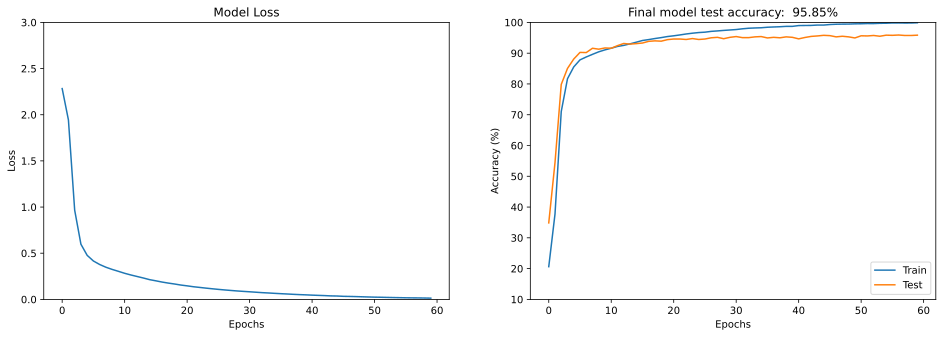

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].plot(losses)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0, 3])
ax[0].set_title("Model Loss")

ax[1].plot(trainAcc, label = "Train")
ax[1].plot(testAcc, label = "Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_ylim([10, 100])
ax[1].set_title(f"Final model test accuracy: {testAcc[-1]: .2f}%")
ax[1].legend()

plt.show()

In [11]:
# run the model thru for the test data
X, y = next(iter(test_loader))
predictions = net(X).detach()

torch.exp(predictions)

tensor([[1.0914e-02, 8.3570e-06, 1.7952e-02,  ..., 9.1638e-09, 1.1053e-02,
         1.3965e-09],
        [2.4476e-13, 7.1240e-03, 3.9101e-08,  ..., 4.0250e-03, 1.7331e-05,
         9.6403e-01],
        [4.1927e-13, 9.9960e-01, 3.2843e-05,  ..., 1.9007e-04, 7.9836e-05,
         2.3368e-06],
        ...,
        [2.2023e-07, 3.8429e-16, 2.7053e-11,  ..., 2.2002e-19, 1.0403e-10,
         2.2798e-17],
        [1.0940e-05, 2.0004e-06, 7.5178e-02,  ..., 1.3986e-08, 6.7982e-06,
         2.0176e-09],
        [2.2042e-08, 3.1263e-11, 3.1088e-14,  ..., 3.3619e-16, 1.9564e-05,
         7.0065e-08]])

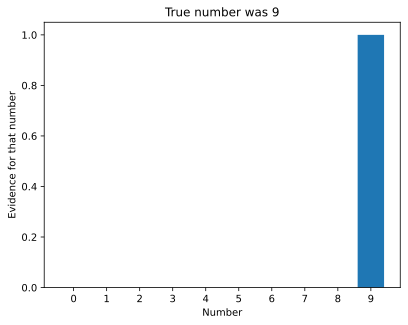

In [12]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10), torch.exp(predictions[sample2show]))
plt.xticks(range(10))
plt.xlabel("Number")
plt.ylabel("Evidence for that number")
plt.title("True number was %s" %y[sample2show].item())
plt.show()

[   6   59   67   71   75   77   85  126  237  239  273  309  365  367
  372  442  446  453  505  525  552  562  565  592  606  646  668  683
  721  746  752  778  780  794  836  887  895  920  973  975 1046 1075
 1078 1080 1100 1123 1157 1210 1250 1302 1324 1325 1339 1364 1368 1372
 1402 1427 1463 1484 1491 1551 1557 1568 1571 1614 1624 1657 1658 1684
 1729 1809 1828 1829 1857 1885 1887 1908 1926 1943 1974 1991 1998]


C:\Users\Admin\AppData\Local\Temp\ipykernel_7072\703362624.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[0].bar(range(10), np.exp(predictions[errors[sample2show]]))


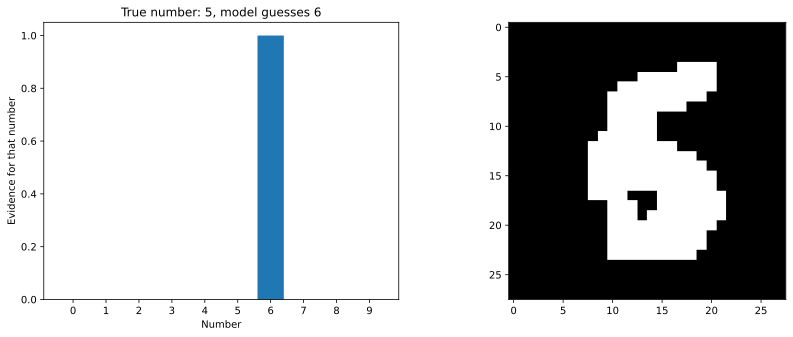

In [13]:
# find the errors
errors = np.where(torch.max(predictions, axis = 1)[1] != y)[0]
print(errors)

# Evidence for all numbers from one sample
sample2show = 4

fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].bar(range(10), np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel("Number")
ax[0].set_ylabel("Evidence for that number")
ax[0].set_title("True number: %s, model guesses %s" 
               %(y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item()))
ax[1].imshow(np.reshape(X[errors[sample2show], :], (28, 28)), cmap = "gray")
plt.show()